NOTA: Este notebook solo contiene el código para usar a modo de plantilla.

Presupone que tienes un entorno de Conda creado donde tienes ya instalados los paquetes usados durante el notebook.

También presupone que conoces conceptos como entranamiento y test, dataframe, predictoras y target, balanceo de datos, etc.

Si todo esto de momento te suena a chino te recomiendo empezar apúntandote de forma 100% gratuita a:

www.tuprimerasemana.com

Ten en cuenta que este notebook es un recurso gratuito descargado por miles de personas y que por tanto no puedo prestar ningún tipo de soporte ni resolución de dudas sobre el mismo.

# IMPORTACIONES BÁSICAS

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# CARGAR DATOS DE LA DEMANDA

In [2]:
# OBTENER PARÁMETROS de la CONEXIÓN

import pyodbc
from dotenv import dotenv_values

secrets = dotenv_values(".env")
local_secrets = dotenv_values(".env.dev")

DRIVER = secrets["DRIVER2"]
SERVIDOR = secrets["SERVIDOR2"]
PUERTO = secrets["PUERTO2"]
BASE = secrets["BASE2"]
USUARIO = secrets["USUARIO2"]
CONTRASENA = secrets["CONTRASENA2"]

constr = f'DRIVER={DRIVER};SERVER={SERVIDOR};PORT={PUERTO};DATABASE={BASE};UID={USUARIO};PWD={CONTRASENA}'

conn_str = (
    "DRIVER={ODBC Driver 17 for SQL Server};"
    "SERVER=10.54.200.90;"
     "PORT=1433;"
    "DATABASE=data-sync;"
    "UID=eettlin;"
    "PWD=lOc4l_eXt$24;"
)

print (constr)
print (conn_str)

DRIVER={ODBC Driver 17 for SQL Server};SERVER=10.54.200.90;PORT=1433;DATABASE=data-sync;UID=eettlin;PWD=lOc4l_eXt$24;
DRIVER={ODBC Driver 17 for SQL Server};SERVER=10.54.200.90;PORT=1433;DATABASE=data-sync;UID=eettlin;PWD=lOc4l_eXt$24;


### Listado de Sucursales

id_tienda	suc_nombre	sucursal	formato
1	MERCADO CENTRAL	Mercado Central	MAYORISTA
2	POSADAS	Posadas	MAYORISTA
3	TRELEW	Trelew	MAYORISTA
4	CASANOVA	Casanova	MAYORISTA
5	SAN MARTIN	San Martin	MAYORISTA
7	BARRACAS	Barracas	MAYORISTA
8	NEUQUEN	Neuquen	MAYORISTA
10	JUNIN	Junin	MAYORISTA
11	BAHIA BLANCA	Bahía Blanca	MAYORISTA
12	LA RIOJA	La Rioja	MAYORISTA
13	PILAR	Pilar	MAYORISTA
15	BERAZATEGUI	Berazategui	MAYORISTA
16	CORRIENTES	Corrientes	MAYORISTA
18	PERGAMINO	Pergamino	MAYORISTA
19	ESQUEL	Esquel	MAYORISTA
20	SANTA ROSA	Santa Rosa	MAYORISTA
21	COM. RIVADAVIA	Comod. Rivadavia	MAYORISTA
22	9 DE JULIO	9 de Julio	MAYORISTA
23	BARILOCHE	Bariloche	MAYORISTA
24	LANUS	Lanus	MAYORISTA
25	PINAMAR	Pinamar	MAYORISTA
26	SALTA	Salta	MAYORISTA
27	VILLA MERCEDES	Villa Mercedes	MAYORISTA
28	ZAPALA	Zapala	MAYORISTA
29	MORON	Morón	MAYORISTA
30	RIO GALLEGOS	Río Gallegos	MAYORISTA
31	TANDIL	Tandil	MAYORISTA
32	CORONEL SUAREZ	Coronel Suarez	MAYORISTA
33	CHASCOMUS	Chascomus	MAYORISTA
34	VIEDMA	Viedma	MAYORISTA
35	CONCORDIA	Concordia	MAYORISTA
36	PARANA	Paraná	MAYORISTA
37	RIO GRANDE	Río Grande	MAYORISTA
38	MARTINEZ	Martinez	MAYORISTA
41	BASE 2	Base 2	MAYORISTA
42	CALETA OLIVIA	Caleta Olivia	MAYORISTA
43	R. SAENZ PENA	R.S.Peña	MAYORISTA
44	CALAFATE	Calafate	MAYORISTA
45	SANTIAGO DEL ESTERO	Santiago del Estero	MAYORISTA
46	CUTRAL CO	Cutral-Co	MAYORISTA
47	SAN RAFAEL	San Rafael	MAYORISTA
48	USHUAIA	Ushuaia                                           	MAYORISTA
49	TRENQUE LAUQUEN	Trenque Lauquen	PUEBLO
60	PEHUAJO	Pehuajó	PUEBLO
61	PUERTO DESEADO	Puerto Deseado	PUEBLO
62	TRES ARROYOS	Tres Arroyos	PUEBLO
64	GENERAL PICO	Gral Pico	MAYORISTA
65	ANELO	Añelo	MAYORISTA
66	LUJAN	Luján	MAYORISTA
67	PIEDRABUENA	Piedra Buena	PUEBLO
68	EL BOLSON	El Bolsón	PUEBLO
69	VENADO TUERTO	Venado Tuerto	PUEBLO
70	PICO TRUNCADO	Pico Truncado	PUEBLO
71	JUNIN DE LOS ANDES	Junín de los Andes	PUEBLO
72	SAN MIGUEL	San Miguel	BARRIO
73	GUALEGUAYCHU	Gualeguaychú	PUEBLO
74	CHILECITO	Chilecito	PUEBLO
75	CHOS MALAL	Chos Malal	PUEBLO
76	BOLIVAR	Bolívar	PUEBLO
77	CONCORDIA-DP	Concordia II	PUEBLO
78	RAFAELA	Rafaela	PUEBLO
79	VIEDMA II	Viedma II	MAYORISTA
85	BASE III	BASE III	C.LOGISTICO
86	CONCEPCION TUCUMAN DP	Concepción Tucumán	PUEBLO
87	RIO TURBIO	Río Turbio	MAYORISTA
100	GOYA CORRIENTES-DP	Goya Corrientes	PUEBLO
301	CÓRDOBA 4325	Córdoba 4325	BARRIO
302	EVA PERON 2701 CAP	Eva Peron 2701	BARRIO
303	SAENZ 1136 CAP	Sáenz 1136	BARRIO
304	PATRICIOS 796	Patricios 796	BARRIO
305	CORRIENTES 3374	Corrientes 3374	BARRIO
306	TACUARI 419 CAP	Tacuarí 419	BARRIO
307	PUEYRREDON 582 CAP	Pueyrredón 582	BARRIO
308	CABILDO 4201	Cabildo 4201	BARRIO
309	MONROE 1616	Monroe 1616	BARRIO
310	SANABRIA	Sanabria	BARRIO
311	CORRALES 6902	Corrales 6902	BARRIO
312	ESCALADA	Escalada	BARRIO
313	CASTANARES 4758 CAP	Castañares	BARRIO
314	CHILAVERT	Chilavert	BARRIO
315	PEDERNERA	Pedernera	BARRIO
316	RAMÓN FALCON	Ramón Falcon	BARRIO
317	ENTRE RIOS 785 CAP	Entre Rios 785	BARRIO
318	CABILDO 3327 CAP	Cabildo 3327/9	BARRIO
319	ALVAREZ JONTE 3629 CAP	Miranda 3629 (ex Alvarez Jonte)	BARRIO
320	AV. CAZÓN 1342	Av. Cazón 1342	BARRIO
322	ALMAFUERTE 3464 SAN JUSTO	Almafuerte 3464	BARRIO
323	ALBERDI 6429 CAP	Alberdi 6429	BARRIO
326	AV. URQUIZA 4884	AV. URQUIZA 4884	BARRIO
328	CALLE 897, N° 4322	Calle 897, N° 4322	BARRIO
330	AV. FRANCISCO BEIRÓ 3261	Av. Francisco Beiró 3261	BARRIO
332	RAMÓN LISTA 5020/22	Ramón Lista 5020/22	BARRIO
333	BARTOLOMÉ MITRE 994	Bartolomé Mitre 994	BARRIO
334	AVELLANEDA 1990 CAP	Av. Avellaneda 1990/1992	BARRIO
335	PATRICIOS 945 CAP	Av. Regimiento Patricios 945	BARRIO
336	AV. SANTA FE 4611	Av. Santa Fe 4611	BARRIO
337	AV. BOEDO 452	Av. Boedo 452	BARRIO
339	SAN LORENZO 2301 SAN MARTIN	San Lorenzo 2301	BARRIO
340	DIAZ VELEZ 4402 CAP	Av. Díaz Vélez 4402	BARRIO
341	LAVALLE 520	Lavalle 520	BARRIO
342	MONTES DE OCA 1049 CAP	Av. Montes de Oca 1049	BARRIO
344	RIO DE JANEIRO  838/40	Rio de Janeiro  838/40	BARRIO
345	MARTIN GARCIA 653 CAP	Martín García 653	BARRIO
346	INDEPENDENCIA 2490 CAP	Independencia 2490	BARRIO
348	CORRIENTES 2970 CAP	Corrientes 2970	BARRIO
351	RIVADAVIA 8517 CAP	Rivadavia 8517	BARRIO
353	RAMON CASTILLO	Ramón Castillo 1721	BARRIO
354	HONORIO PUEYRREDON CAP	Honorio Pueyrredon 1740	BARRIO
357	ACOYTE 260 CAP	Acoyte 262	BARRIO
359	BALBIN 3650	Balbin 3650	BARRIO
360	PUEYRREDON 1068	Pueyrredon 1068	BARRIO
361	CORRIENTES 5270 	Corrientes 5270 	BARRIO
362	GASCON 685	Gascon 685	BARRIO
367	AV ALTE BROWN 1057	Av Alte Brown 1057	BARRIO
368	ALVEAR 2331	Alvear 2331	BARRIO
369	LOPE DE VEGA 1888	Lope De Vega 1888	BARRIO
370	BAEZ 777	Baez 777	BARRIO
373	JUAN BAUTISTA ALBERDI 77	Juan Bautista Alberdi 77	BARRIO
381	CORRIENTES 5288	Corrientes 5288	BARRIO
382	RIVADAVIA 8224	Rivadavia 8224	BARRIO
383	SAN MARTIN 546	San Martin 546	BARRIO
384	AV.RIVADAVIA 11678	Av.Rivadavia 11678	BARRIO
385	CORRIENTES 1900	Corrientes 1900	BARRIO
386	RIO DE JANEIRO 793	Rio De Janeiro 793	BARRIO
387	DIAZ VELEZ 41734175	Diaz Velez 41734175	BARRIO
388	AV.CORRALES 7417	Av.Corrales 7417	BARRIO
390	SAN JUAN 2692	San Juan 2692	BARRIO
391	TRIUNVIRATO 4207	Triunvirato 4207	BARRIO
393	FRANCISCO BEIRO  4386 	Francisco Beiro  4386 	BARRIO
394	LAVALLE 1765	Lavalle 1765	BARRIO
395	NAZARRE 251214	Nazarre 251214	BARRIO
396	AV.CABILDO 4662	Av.Cabildo 4662	BARRIO
397	AV.FRANCISCO BEIRO 5450	Av.Francisco Beiro 5450	BARRIO
399	CAMARONES 14121424	Camarones 14121424	BARRIO
400	AV.SARMIENTO 1641	Av.Sarmiento 1641	BARRIO
402	CABELLO 3417	Cabello 3417	BARRIO
403	RIVADAVIA 2446	Rivadavia 2446	BARRIO

id_tienda	suc_nombre	sucursal	formato
1	MERCADO CENTRAL	Mercado Central	MAYORISTA
2	POSADAS	Posadas	MAYORISTA
3	TRELEW	Trelew	MAYORISTA
4	CASANOVA	Casanova	MAYORISTA
5	SAN MARTIN	San Martin	MAYORISTA

In [3]:
import pandas as pd
import pyodbc

# Configuración de conexión
conn_str = f'DRIVER={DRIVER};SERVER={SERVIDOR};PORT={PUERTO};DATBASE={BASE};UID={USUARIO};PWD={CONTRASENA}'

conn = pyodbc.connect(conn_str)

query = """
/*** ALGORITMOS PARA DEMANDA PYTHON  (UTILIZA: DiarcoEst SERVER=192.168.0.250 ***/
SELECT  V.[F_VENTA]
      ,V.[C_ARTICULO]
      ,V.[C_SUCU_EMPR]
      ,V.[I_PRECIO_VENTA]
      ,V.[I_PRECIO_COSTO]
      ,V.[I_VENDIDO]
      ,V.[Q_UNIDADES_VENDIDAS]
      ,V.[I_PRECIO_COSTO_PP]
  
      ,V.[C_FAMILIA]
      ,A.[C_RUBRO]
      ,A.[C_SUBRUBRO_1]
      ,A.[C_SUBRUBRO_2]
      ,A.[N_ARTICULO]
 
  FROM [DCO-DBCORE-P02].[DiarcoEst].[dbo].[T702_EST_VTAS_POR_ARTICULO] V
  LEFT JOIN [DCO-DBCORE-P02].[DiarcoEst].[dbo].[T050_ARTICULOS] A 
	ON V.C_ARTICULO = A.C_ARTICULO
WHERE V.[C_SUCU_EMPR] = 5  AND
V.F_VENTA >='20240101';
"""
data = pd.read_sql(query, conn)
conn.close()

C:\Users\eduar\AppData\Local\Temp\ipykernel_10800\1189932109.py:32: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql(query, conn)


In [4]:
# Guardar en CSV
data.to_csv('data/datos_SanMartin.csv', index=False, encoding='utf-8')

print("Datos guardados exitosamente en 'datos_SanMartin.csv'")

Datos guardados exitosamente en 'datos_SanMartin.csv'


# DATASET PARA ALGORITMOS SUPERVISADOS

## CARGA DEL FICHERO

In [5]:
#df = pd.read_csv('direct_marketing.csv')
data.head()

,F_VENTA,C_ARTICULO,C_SUCU_EMPR,I_PRECIO_VENTA,I_PRECIO_COSTO,I_VENDIDO,Q_UNIDADES_VENDIDAS,I_PRECIO_COSTO_PP,C_FAMILIA,C_RUBRO,C_SUBRUBRO_1,C_SUBRUBRO_2,N_ARTICULO
0,2024-01-02,37.0,5.0,1127.200,880.004,794676.000,705.0,237.1215,3.0,2053.0,2056.0,2061.0,Aceite Natura Girasol 900 Ml ...
1,2024-01-02,37.0,5.0,1127.249,880.004,20290.482,18.0,237.1215,3.0,2053.0,2056.0,2061.0,Aceite Natura Girasol 900 Ml ...
2,2024-01-02,52.0,5.0,1032.984,883.671,139452.840,135.0,239.5533,3.0,2053.0,2056.0,2061.0,Aceite Cocinero Girasol 900 Ml ...
3,2024-01-02,52.0,5.0,1032.999,883.671,41319.960,40.0,239.5533,3.0,2053.0,2056.0,2061.0,Aceite Cocinero Girasol 900 Ml ...
4,2024-01-02,109.0,5.0,384.999,238.750,1154.997,3.0,185.5707,4.0,3548.0,3549.0,3550.0,Budin Fantasia Chocolate 180 Gr ...


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 656845 entries, 0 to 656844
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   F_VENTA              656845 non-null  datetime64[ns]
 1   C_ARTICULO           656845 non-null  float64       
 2   C_SUCU_EMPR          656845 non-null  float64       
 3   I_PRECIO_VENTA       656845 non-null  float64       
 4   I_PRECIO_COSTO       656845 non-null  float64       
 5   I_VENDIDO            656845 non-null  float64       
 6   Q_UNIDADES_VENDIDAS  656845 non-null  float64       
 7   I_PRECIO_COSTO_PP    656845 non-null  float64       
 8   C_FAMILIA            656845 non-null  float64       
 9   C_RUBRO              656845 non-null  float64       
 10  C_SUBRUBRO_1         656845 non-null  float64       
 11  C_SUBRUBRO_2         656845 non-null  float64       
 12  N_ARTICULO           656845 non-null  object        
dtypes: datetime64[

In [10]:
data.Q_UNIDADES_VENDIDAS.value_counts()

Q_UNIDADES_VENDIDAS
1.000    203392
2.000     95719
3.000     78464
6.000     40999
4.000     34752
          ...  
6.944         1
3.456         1
1.179         1
4.354         1
1.686         1
Name: count, Length: 4806, dtype: int64

## BALANCEO DE CLASES

In [4]:
from sklearn.utils import resample

df_majority = data[data['conversion'] == 0]
df_minority = data[data['conversion'] == 1]

df_majority_downsampled = resample(df_majority, replace=False, n_samples=len(df_minority), random_state=42)

df_balanced = pd.concat([df_majority_downsampled, df_minority])

## PREDICTORAS Y TARGET

In [5]:
X = df_balanced[['recency',
 'history_segment',
 'history',
 'mens',
 'womens',
 'zip_code',
 'newbie',
 'channel',
 'segment',
 'DM_category']]
       
y = df_balanced.conversion       

## PREPARACIÓN DE DATOS

In [6]:
from sklearn.preprocessing import OneHotEncoder

object_columns = X.select_dtypes(include=['object']).columns

encoder = OneHotEncoder(sparse_output=False, drop='first')

X_encoded = pd.DataFrame(encoder.fit_transform(X[object_columns]))
X_encoded.columns = encoder.get_feature_names_out(object_columns)

X = X.drop(object_columns, axis=1).reset_index()


In [7]:
X = pd.concat([X, X_encoded], axis=1)

In [8]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
columns = X.columns
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=columns)


## SEPARACIÓN DE TRAIN Y TEST

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

## FUNCIÓN PARA MEDIR EL ERROR

In [10]:
from sklearn.metrics import roc_auc_score

def mide_error(nombre_modelo, y_pred):
    auc = roc_auc_score(y_test, y_pred)
    print(f'AUC de {nombre_modelo}: ', round(auc,2))

# DATASET PARA SERIES TEMPORALES

## CARGA DEL FICHERO

In [12]:
import statsmodels.api as sm

df_st = sm.datasets.macrodata.load_pandas().data.loc[:,['year','quarter','infl']]
#df_st['period'] = pd.PeriodIndex(year=df_st['year'], quarter=df_st['quarter'], freq='Q')
df_st['period'] = pd.PeriodIndex.from_fields(year=df_st['year'], quarter=df_st['quarter'], freq='Q')

df_st.set_index('period', inplace=True)
df_st.drop(['year', 'quarter'], axis=1, inplace=True)
df_st.head()

,infl
period,
1959Q1,0.00
1959Q2,2.34
1959Q3,2.74
1959Q4,0.27
1960Q1,2.31


## SEPARACIÓN DE TRAIN Y TEST

In [13]:
train_data = df_st.iloc[:-4]
test_data = df_st.iloc[-4:] 
train_data = train_data['infl'].values.astype(np.float64)

# REGRESIÓN LOGÍSTICA

In [14]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='newton-cg')
logreg.fit(X_train, y_train)

y_pred = logreg.predict_proba(X_test)[:,1]

mide_error('Regresión Logística', y_pred)

AUC de Regresión Logística:  0.6


# KNN

In [15]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

y_pred = knn.predict_proba(X_test)[:,1]

mide_error('KNN', y_pred)

AUC de KNN:  0.57


# NAIVE BAYES

In [16]:
from sklearn.naive_bayes import BernoulliNB

naive_bayes = BernoulliNB()
naive_bayes.fit(X_train, y_train)

y_pred = naive_bayes.predict_proba(X_test)[:,1]

mide_error('Naive Bayes', y_pred)

AUC de Naive Bayes:  0.58


# K-MEDIAS

In [17]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5)

kmeans.fit(X_train)

kmeans.labels_[:10]

array([0, 2, 4, 3, 3, 2, 3, 1, 3, 4], dtype=int32)

# ÁRBOL DE DECISIÓN

In [18]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

y_pred = tree.predict_proba(X_test)[:,1]

mide_error('Árbol de Decisión', y_pred)

AUC de Árbol de Decisión:  0.58


# ARIMA

In [25]:
from pmdarima import auto_arima


model = auto_arima(train_data, seasonal=False, suppress_warnings=True)
model_fit = model.fit(train_data)
predictions = model_fit.predict(n_periods=len(test_data))


plt.figure(figsize=(12, 6))
plt.plot(df_st[-12:].index.strftime('%YQ%q'), df_st[-12:].infl, label='Realidad')
plt.plot(df_st[-4:].index.strftime('%YQ%q'), predictions, label='Predicción')
plt.xticks(rotation=45, fontsize=8);

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

# SUAVIZADO EXPONENCIAL

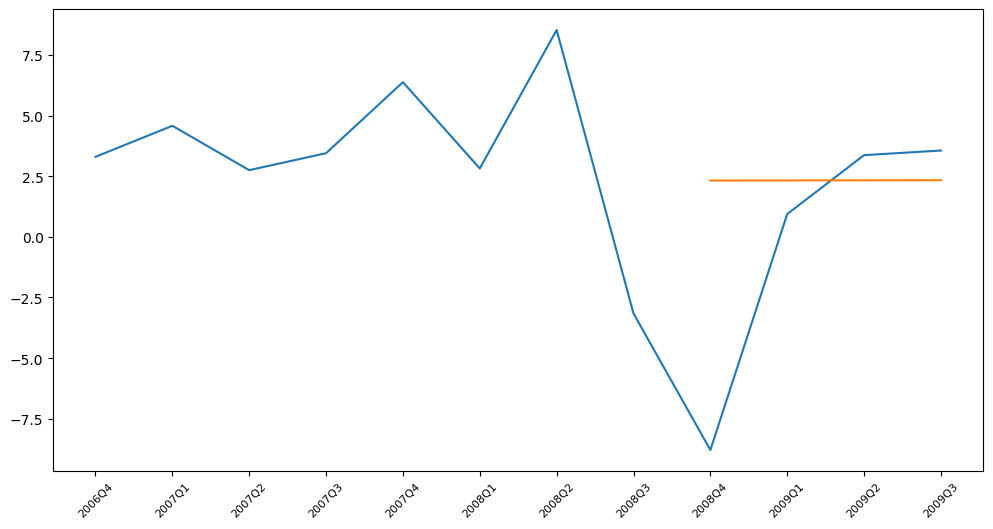

In [26]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model = ExponentialSmoothing(train_data, seasonal=None, trend='add')
model_fit = model.fit()
predictions = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)

plt.figure(figsize=(12, 6))
plt.plot(df_st[-12:].index.strftime('%YQ%q'), df_st[-12:].infl, label='Realidad')
plt.plot(df_st[-4:].index.strftime('%YQ%q'), predictions, label='Predicción')
plt.xticks(rotation=45, fontsize=8);

# RANDOM FOREST

In [27]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

y_pred = random_forest.predict_proba(X_test)[:,1]

mide_error('Random Forest', y_pred)


AUC de Random Forest:  0.58


# XGBBOOST

In [28]:
from xgboost import XGBClassifier

xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train, y_train)

y_pred = xgb_classifier.predict_proba(X_test)[:,1]

mide_error('XGBboost', y_pred)

AUC de XGBboost:  0.53


# LIGHTGBM

In [29]:
from sklearn.ensemble import HistGradientBoostingClassifier

hist_gradient_boosting = HistGradientBoostingClassifier()
hist_gradient_boosting.fit(X_train, y_train)

y_pred = hist_gradient_boosting.predict_proba(X_test)[:,1]

mide_error('XGBboost', y_pred)

AUC de XGBboost:  0.54
